In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Input

In [ ]:
IMG_HEIGHT = 72
IMG_WIDTH = 72
BATCH_SIZE = 32
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [55]:
train_generator = train_datagen.flow_from_directory(
    'data/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'data/',
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 4872 images belonging to 2 classes.
Found 1218 images belonging to 2 classes.


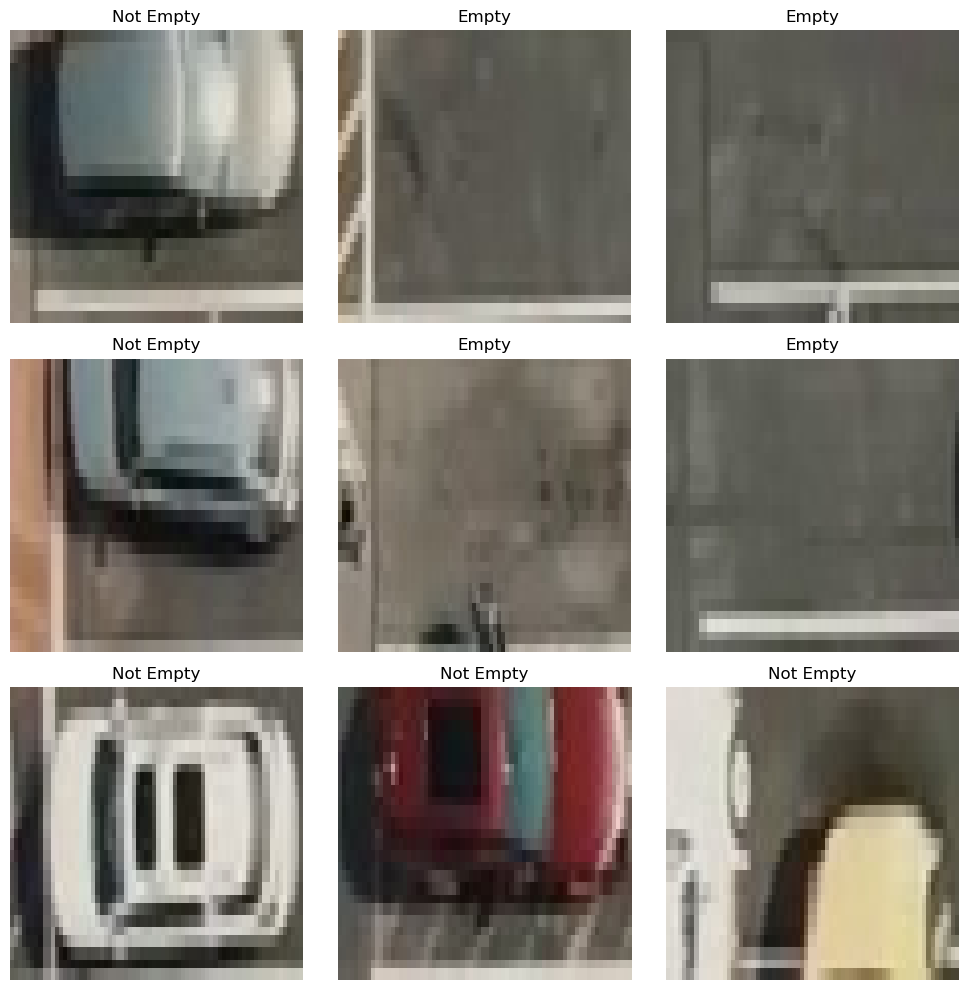

In [ ]:
images, labels = next(train_generator)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Not Empty" if labels[i] == 1 else "Empty")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential([
    Input(shape=(None, None, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5709 - loss: 0.6566 - val_accuracy: 0.9729 - val_loss: 0.3073
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9385 - loss: 0.2594 - val_accuracy: 0.9491 - val_loss: 0.1490
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9518 - loss: 0.1519 - val_accuracy: 0.9803 - val_loss: 0.0974
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9586 - loss: 0.1191 - val_accuracy: 0.9852 - val_loss: 0.0678
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9737 - loss: 0.0839 - val_accuracy: 0.9795 - val_loss: 0.0661
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9780 - loss: 0.0733 - val_accuracy: 0.9795 - val_loss: 0.0550
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9833 - loss: 0.0522 - val_accuracy: 0.9901 - val_loss: 0.0264
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.9862 - loss: 0.0393 - val_accu

In [ ]:
model.save('parking_slot_classifier.h5')